In [30]:
import nibabel as nib
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sin,cos
from sklearn.metrics import hamming_loss
from itertools import groupby
from sklearn.model_selection import train_test_split
import csv

In [89]:
n_max = 278
n_test_max = 138
testpre = "set_test/test_"
trainpre = "set_train/train_"

asbool = lambda x: str(int(x) is 1)

def saveCSV(y,filename):
  fname = filename + ".csv"
  f = open(fname,"wb")
  wr = csv.writer(f,delimiter=",")
  wr.writerow(["ID","Sample","Label","Predicted"])
  for i in range(len(y[:,0])):
    wr.writerows([ [i*3,i,"gender",asbool(y[i,0])],
                   [i*3+1,i,"age",asbool(y[i,1])],
                   [i*3+2,i,"health",asbool(y[i,2])] ])
  f.close()
  return fname

prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

percent = lambda x:"%2.1f%%"%(x*100)

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1

# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y = np.zeros((n_max,3))
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
space = 15 # 35,50,70,100,150
hSize = space-1
bins = np.linspace(1,1700,space)
sbins = bins[:-1]+1800/space/2

r_division = 8
theta_division = 8
phi_division = 8
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin

ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division

fnameSpherical = "spherical_every2.npy"
xSpherical = [] # np.load(fnameSpherical)

bSize = hSize+2
ds = nBlocks*bSize
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

In [90]:
# print "Number of Blocks:",nBlocks
# print "Size of Histograms:",hSize
# print "Numbers per Block:",bSize
# print "Dimensions: ca.",ds

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fname = "src/histsSize%s_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "%s" % fname[:-4]


def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    iD = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > iD+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        iD = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      i0=0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        i1=0
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          i2=0
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            avg = np.average(cut)
            std = np.std(cut)
            xa[i,idxsFor(hCount,2)] = [avg,std]
            hCount = hCount + 1
            i2 = i2+1
          i1 = i1+1
        i0 = i0+1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if False:
  loadAndPreprocess()

xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

# print "Example:",xa[0,:20],"..."

print """Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
  i = 2 ... 0.5%
  i = 5 ... 1.2%
  i = 10 ... 2.4%
  i = 19 ... 4.6%
  i = 36 ... 8.7%
  i = 69 ... 16.6%
  i = 115 ... 27.6%
  i = 161 ... 38.7%
  i = 207 ... 49.8%
  i = 253 ... 60.8%
  i = 299 ... 71.9%
  i = 345 ... 82.9%
  i = 391 ... 94.0%
======= Saved data matrix xa into src/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8.npy =========
Example: [   0.            0.           37.           28.          462.            3.
   45.          143.           64.           93.          268.            7.
    0.            0.          842.89913043  313.06656925    0.            0.
    1.            0.        ] ..."""



Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
  i = 2 ... 0.5%
  i = 5 ... 1.2%
  i = 10 ... 2.4%
  i = 19 ... 4.6%
  i = 36 ... 8.7%
  i = 69 ... 16.6%
  i = 115 ... 27.6%
  i = 161 ... 38.7%
  i = 207 ... 49.8%
  i = 253 ... 60.8%
  i = 299 ... 71.9%
  i = 345 ... 82.9%
  i = 391 ... 94.0%
======= Saved data matrix xa into src/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8.npy =========
Example: [   0.            0.           37.           28.          462.            3.
   45.          143.           64.           93.          268.            7.
    0.            0.          842.89913043  313.06656925    0.            0.
    1.            0.        ] ...


In [91]:
# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b if not (a2 is 1 and a3 is 0)]
Ntypes = len(types)

def get_by(t,ys):
  idxs = range(0,len(ys))
  return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = np.array([get_by(t,y) for t in types])
ratios = [float(len(i))/n_max for i in typeIdxs]

# The procedure will add so many nonClass samples to the split, until at least 30% don't belong to any class
# for None, this doSplit returns a tuple of elements.
# for the other arguments, doSplit list of such tuples
def doSplit(test_size=0.25,rs=1,show=False):
  def mkTuple(ttr,tts,lastIsNil,classes):
    ys = lambda i: [classes[i] if i < 2 else -1]
    return (ttr,tts,
             np.vstack([x[idxs] for idxs in ttr]),
             np.vstack([x[idxs] for idxs in tts]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(ttr)]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(tts)]) )
  
  typeIdxsTR = []
  typeIdxsTS = []
  for i in range(0,Ntypes):
    atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=test_size,random_state=rs)
    typeIdxsTR.append(atr)
    typeIdxsTS.append(ats)
  typeIdxsTR = np.array(typeIdxsTR)
  typeIdxsTS = np.array(typeIdxsTS)
  # gender: 1 = female, 0 = male
  # age: 1 = young, 0 = old
  # health: 1 = healthy, 0 = sick
  return mkTuple(typeIdxsTR,typeIdxsTS,False,None)

print "Class representation"
r = map(lambda x:int(x*100),ratios)
for i in range(0,6):
  print types[i],("%2.1f%%"%r[i]),(r[i]*"=")

Class representation
[0, 0, 0] 10.0% ==========
[0, 0, 1] 6.0% ======
[0, 1, 1] 22.0% ======================
[1, 0, 0] 14.0% ==============
[1, 0, 1] 17.0% =================
[1, 1, 1] 29.0% =============================


In [92]:
def visualize(labelName,y_pred):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

def applyClassification(model,label,split=None):
  (_,_,xtr,xts,ytr,yts) = split
  get_label = lambda ys: ys[:,label]
  
  # processing line
  xtr1 = np.array(xtr,copy=True)
  xtrAvg = np.average(xtr,axis=0)
  xtrStdDev = np.std(xtr,axis=0)
  xtr1 = (xtr1 - xtrAvg)/(xtrStdDev+0.00001)
  ytr_pred = model.fit(xtr1,get_label(ytr)).predict(xtr1)
  
  def predict(xData):
    xData2 = np.array(xData,copy=True)
    xData2 = (xData - xtrAvg)/(xtrStdDev+0.00001)
    yPred = model.predict(xData2)
    return yPred
  
  yts_pred = predict(xts)
  y_t_pred = predict(x_t)
  
  #y_t_pp = prep_single(y_t_pred)
  yts_pp = prep_single(yts_pred)
  ytr_pp = prep_single(ytr_pred)

  trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
  tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
  ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
  lts = 100*hamming_loss(get_label(yts),yts_pp)

  print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
    
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred,predict

import random

def applyClassificationSeparated(classf,trs,test_size,n_splits):
  prefix = classf[0]
  
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  results = []
  
  #using a random_state for the test case splitting. it needs to be different for each split, thus the index of
  # the split is added to a factor of the trs. for different values of trs (0,1,2,...) it will produce very different splits
  splits = [doSplit(test_size=test_size,rs=i+30*trs) for i in range(0,n_splits)]
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  for i,split in enumerate(splits):
    print "============== SPLIT # %s # ================" % i
    
    subClassResults = []
    _,_,_,_,ytr,yts = split
    model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1,prdt1 = applyClassification(classf[1],0,split=split)
    model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2,prdt2 = applyClassification(classf[1],1,split=split)
    model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3,prdt3 = applyClassification(classf[1],2,split=split)

    ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
    yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
    y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()

    def predictor(xData):
      lb1 = prdt1(xData)
      lb2 = prdt2(xData)
      lb3 = prdt3(xData)
      ys = np.array([lb1,lb2,lb3]).transpose()
      return ys

    models = [model1,model2,model3]

    y_pred_T = prep(y_t_pred_real)
    y_pred_tr = prep(ytr_pred_real)
    y_pred_ts = prep(yts_pred_real)
    y_t_pred = y_pred_T
    ltr = 100*hamming_loss(ytr,y_pred_tr)
    lts = 100*hamming_loss(yts,y_pred_ts)
    
    print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)

    results.append([y_t_pred,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models,predictor])
    
  return results

In [86]:
def doStuff(test_size,n_splits,trs,kernel,coef0,deg,C,rs):
  
  print "Number of Blocks:",nBlocks
  print "Size of Histograms:",hSize
  print "Numbers per Block:",bSize
  print "Dimensions: ca.",ds
  
  prefix = "%s_kSVM_kernel%s_C%s_def%s_coef0_%s_rs%s"%(name,kernel,C,deg,coef0,rs)
  model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0,random_state=rs,probability=True)
    
  prefix = "%s_TEST_SIZE%s_n%s_trs%s" % (prefix,test_size,n_splits,trs)
  
  # results = [(y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models),...]
  results = applyClassificationSeparated((prefix,model),test_size=test_size,trs=trs,n_splits=n_splits)
  # compute average predictions:
  yt_real = np.average([r[1][2] for r in results],axis=0)
  
  ltravg = np.average([r[3] for r in results],axis=0)
  ltsavg = np.average([r[4] for r in results],axis=0)
  ltrstd = np.std([r[3] for r in results],axis=0)*n_splits/(n_splits-1) # empirical std, estimation
  ltsstd = np.std([r[4] for r in results],axis=0)*n_splits/(n_splits-1)
  
  y_pred_T = prep(yt_real)

  print "\n### ltr %2.1f%% (+/- %2.2f) | ===== lts %2.1f%% (+/- %2.2f) ==== ###\n" % (ltravg,ltrstd,ltsavg,ltsstd)
  
  prefix = "%s_ltsavg%.3f_ltsstd%.3f"%(prefix,ltsavg/100,ltsstd/100)
  
  models = results[-1][5]
  
  visualize("Gender",y_pred_T[:,0])
  visualize("Age   ",y_pred_T[:,1])
  visualize("Health",y_pred_T[:,2])
  
  nsp = np.array([m.n_support_ for s in results for m in s[5]])
  xs = sorted(nsp.ravel())
  print "# Indices of the Support Vectors used and their frequency of occurences in the models:"
  for sv,svls in groupby(xs):
    count = len(list(svls))
    print " ",sv,("("+str(count)+" times) "),count*"="
    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))
  
  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.35
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Training distribution")
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = yt_real[:,0]
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Public Test predictions")
  ax.view_init(azim=20)

  ax = fig.add_subplot(224, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  ax.set_title("Public Test finalized")
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  savePrediction(y_pred_T,"final_sub")
  
  result = {
    "res":results,
    "ltrs":[r[3] for r in results],
    "ltss":[r[4] for r in results],
    "ltsavg":ltsavg,
    "ltsstd":ltsstd
  }
  return result

Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
### Prediction with ###
   src/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_TEST_SIZE0.2_n10_trs1 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
============== SPLIT # 0 # ================
|   220    /      0    |    53   /       5    |    0.0%     |     8.6%     |
|   220    /      0    |    56   /       2    |    0.0%     |     3.4%     |
|   220    /      0    |    49   /       9    |    0.0%     |     15.5%     |
|                     Total                   |    0.0%     | >>  9.2%  << |
============== SPLIT # 1 # ================
|   220    /      0    |    50   /       8    |    0.0%     |     13.8%     |
|   220    /      0    |    54   /       4    |    0.0%     |     6.9%     |
|   220    /      0    |    49   /       9    |    0.0%     |  

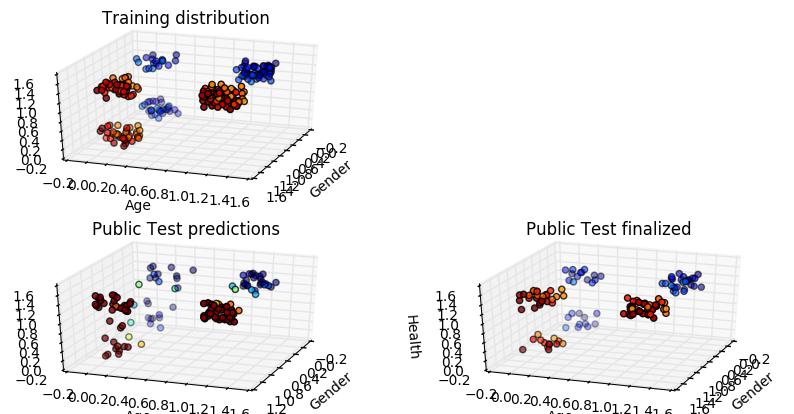

Saved predictions into src/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_TEST_SIZE0.2_n10_trs1_ltsavg0.111_ltsstd0.013.csv
Saved predictions into final_sub.csv


In [88]:
result = doStuff(
  # One-vs-One with Kernel Support Vector Machines.
  # we are making three different models. each for gender, age and health
  kernel="poly",coef0=1,deg=2,C=5e0,rs=0,     # oooh! stable, 13% public
  test_size=0.2,n_splits=10,trs=1)